In [1]:
import tradingeconomics as te
import pandas as pd

import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [3]:
first_date = '2019-01-01'
last_date = '2019-12-31'
raw_data = te.fetchMarkets(symbol=['eurusd:cur', 'usdeur:cur', 'gbpusd:cur','usdgbp:cur'], initDate=first_date, endDate= last_date, output_type='df')


In [4]:
eurusd = raw_data.loc[raw_data['symbol'] == 'EURUSD:CUR']
gbpusd = raw_data.loc[raw_data['symbol'] == 'GBPUSD:CUR']
usdgbp = raw_data.loc[raw_data['symbol'] == 'USDGBP:CUR']
usdeur = raw_data.loc[raw_data['symbol'] == 'USDEUR:CUR']

eurusd = eurusd[['close']].rename(columns={'close': 'eurusd'})
eurusd.index.name = 'Date'

gbpusd = gbpusd[['close']].rename(columns={'close': 'gbpusd'})
gbpusd.index.name = 'Date'

usdgbp = usdgbp[['close']].rename(columns={'close': 'usdgbp'})
usdgbp.index.name = 'Date'

usdeur = usdeur[['close']].rename(columns={'close': 'usdeur'})
usdeur.index.name = 'Date'

df = pd.merge(pd.merge(pd.merge(eurusd,gbpusd, on='Date'),usdgbp, on='Date'),usdeur, on='Date')


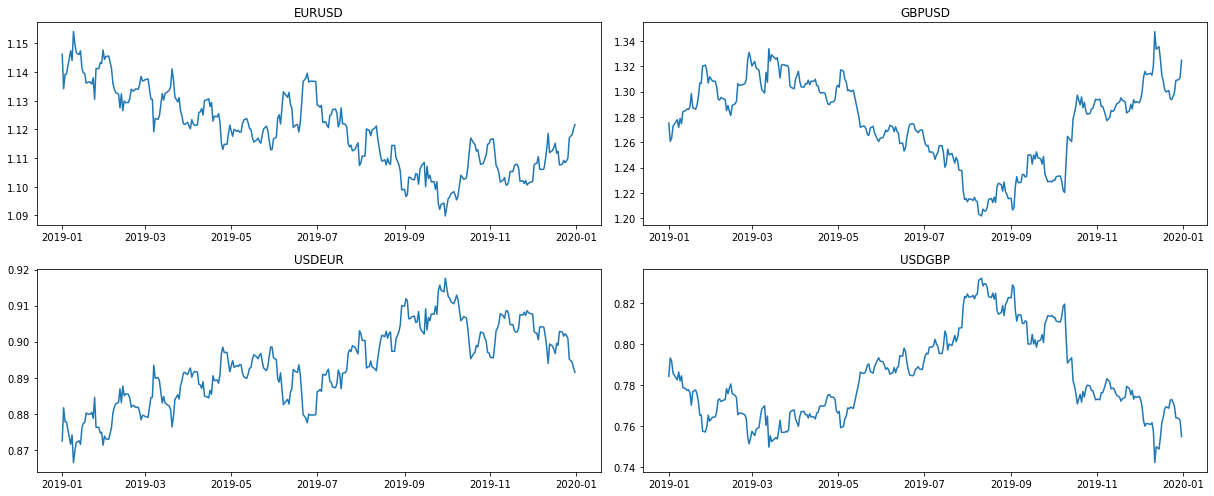

In [7]:
index = df.index.tolist()

fig, axs = plt.subplots(2,2,figsize=(17, 7))

axs[0, 0].plot(index,df['eurusd'])
axs[0, 0].set_title("EURUSD")


axs[1, 0].plot(index,df['usdeur'])
axs[1, 0].set_title("USDEUR")


axs[0, 1].plot(index,df['gbpusd'])
axs[0, 1].set_title("GBPUSD")


axs[1, 1].plot(index,df['usdgbp'])
axs[1, 1].set_title("USDGBP")
fig.tight_layout()